In [1]:
# Import all needed libraries

from __future__ import print_function

import numpy as np
import keras

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, SpatialDropout2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [8]:
# Load training and test dataset 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shape of training and test datasets
print('Shape of training set :' ,x_train.shape)
print('shape of test set :', x_test.shape )
print('shape of training_labels:', y_train.shape)
print('shape of test labels:', y_test.shape)
print('Number of training samples = ', x_train.shape[0])
print('Number of test samples = ', x_test.shape[0])


Shape of training set : (50000, 32, 32, 3)
shape of test set : (10000, 32, 32, 3)
shape of training_labels: (50000, 1)
shape of test labels: (10000, 1)
Number of training samples =  50000
Number of test samples =  10000


This image is of class:  [2]


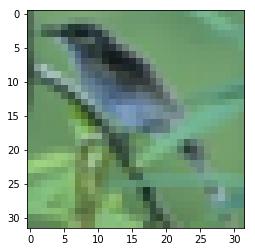

In [3]:
# Visualize  training set 
training_sample = 800;                # Change this to any value between 0 to 49999 and see how different training images look like
myImage = x_train[training_sample,:,:,:];
imshow(myImage)
print('This image is of class: ' , y_train[training_sample])

In [4]:
# Model without spatial dropout

model = Sequential([
    
    # Conv layer 1
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
          input_shape = (x_train.shape[1:]),name = 'convlayer-1'),
    BatchNormalization(axis = 3, name = 'bn1'),
    Activation('relu'),
    
    
    # Conv layer 2
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
           name = 'convlayer-2'),
    BatchNormalization(axis = 3, name = 'bn2'),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    # Conv layer 3
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (1,1),kernel_initializer = keras.initializers.glorot_normal(),name = 'convlayer-3'),
    BatchNormalization(axis = 3, name = 'bn3'),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    # Conv layer 4
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
           name = 'convlayer-4'),
    BatchNormalization(axis = 3, name = 'bn4'),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    # Flattening and starting of fully connected layer
    Flatten(),
    Dense(512, name = 'fc1'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    # Fc2 
    Dense(256, name = 'fc2'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(10,name = 'outputLayer'),
    BatchNormalization(),
    Activation('softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compile the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
# Normalizing the train and test set
x_train = x_train/255;
x_test = x_test/255;


In [0]:
# Fit the model - Epoch 20

model.fit(x = x_train, y = y_train, verbose = 1, validation_split = 0.2, epochs = 50, batch_size = 16)

In [12]:
scores = model.evaluate(x_test, y_test, verbose = 1)

10000/10000 [==============================] - 1s 135us/step


In [13]:
print('Test loss: ', scores[0])
print('Test Accuracy: ', scores[1])

Test loss:  0.7102900995731354
Test Accuracy:  0.811


In [14]:
# Saving the model run with 50 epochs
import os
save_dir = os.path.join(os.getcwd(), 'CIFAR10')
model_name = 'cifar10_epochs50_nospatialdropout.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/CIFAR10/cifar10_epochs20_nospatialdropout.h5 


In [0]:
# Second model with spatial dropout 

model_1 = Sequential([
    
    # Conv layer 1
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
          input_shape = (x_train.shape[1:]),name = 'convlayer-1'),
    SpatialDropout2D(0.05),
    BatchNormalization(axis = 3, name = 'bn1'),
    Activation('relu'),
    
    
    # Conv layer 2
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
           name = 'convlayer-2'),
    BatchNormalization(axis = 3, name = 'bn2'),
    Activation('relu'),
    SpatialDropout2D(0.1),
    MaxPooling2D((2,2)),
    
    # Conv layer 3
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (1,1),kernel_initializer = keras.initializers.glorot_normal(),name = 'convlayer-3'),
    BatchNormalization(axis = 3, name = 'bn3'),
    Activation('relu'),
    SpatialDropout2D(0.1),
    MaxPooling2D((2,2)),
    
    # Conv layer 4
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', strides = (1,1), kernel_initializer = keras.initializers.glorot_normal(),
           name = 'convlayer-4'),
    BatchNormalization(axis = 3, name = 'bn4'),
    Activation('relu'),
    SpatialDropout2D(0.1),
    MaxPooling2D((2,2)),
    
    # Flattening and starting of fully connected layer
    Flatten(),
    Dense(512, name = 'fc1'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    # Fc2 
    Dense(256, name = 'fc2'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(10,name = 'outputLayer'),
    BatchNormalization(),
    Activation('softmax')
    
])

In [0]:
# Model Flowchart
#model_1.summary()

# Compile the model
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Fit the model - Epoch 20
model_1.fit(x = x_train, y = y_train, verbose = 1, validation_split = 0.2, epochs = 50, batch_size = 16)



In [18]:
# Evaluate the model
scores = model_1.evaluate(x_test, y_test, verbose = 1)
print('Test loss: ', scores[0])
print('Test Accuracy: ', scores[1])

# Saving the model run with 50 epochs
import os
save_dir = os.path.join(os.getcwd(), 'CIFAR10')
model_name = 'cifar10_epochs50_withspatialdropout.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Saved trained model at %s ' % model_path)

10000/10000 [==============================] - 1s 133us/step
Test loss:  0.5867330080509185
Test Accuracy:  0.8195
Saved trained model at /content/CIFAR10/cifar10_epochs20_withspatialdropout.h5 


predicted class is: 3
correct_class is: [3]


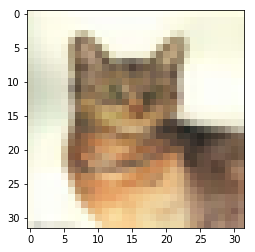

In [21]:
test_sample = 786
x = x_test[test_sample,:,:,:]
imshow(x)

x = np.expand_dims(x, axis=0)
print('predicted class is:', np.argmax(model_1.predict(x)))
print('correct_class is:', y_test[test_sample])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


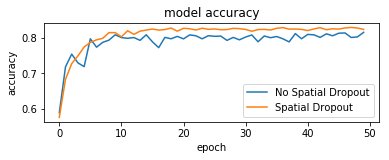

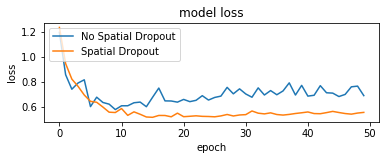

In [34]:
# Plot validation accuracy over epochs with and without spatial dropout
plt.subplot(2,1,1).plot(model.history.history['val_acc'])
plt.subplot(2,1,1).plot(model_1.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['No Spatial Dropout', 'Spatial Dropout'], loc='lower right')
plt.show()

# Plot validation loss over epochs with and without spatial dropout
plt.subplot(2,1,2).plot(model.history.history['val_loss'])
plt.subplot(2,1,2).plot(model_1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['No Spatial Dropout', 'Spatial Dropout'], loc='upper left')
plt.show()